# **MEEN 423: Machine Learning for Mechanical Engineers**
# Homework 4: Binary classification with Artificial Neural Networks

## Objective

Train a binary classifier using an ANN to understand its performance and characteristics. Analyze and visualize the dataset, train different models, evaluate their performance, and draw insights from various metrics and visualizations.

## Background

In a power generation plant, turbine blades are critical components for generating electricity. These blades convert the energy from steam into mechanical energy that drives the generator. However, over time, the turbine blades are subjected to extreme conditions leading to wear, corrosion, and other forms of degradation.

In this dataset, we have sensor readings from a number of turbine blades. Two features are particularly significant:

    * Vibration Frequency (Hz): This is measured by a vibration sensor attached to the base of each turbine blade.
    * Temperature (°C): This is measured by a temperature sensor embedded within the blade.

Each blade has a label:

    * 1(True): Indicates that the blade has a defect
    * 0(False): Indicates that the blade is in normal condition.

Detecting defective blades early is crucial to ensure the efficiency, safety, and longevity of the power plant. Your task is to develop a classifier to identify potentially defected turbine blades based on these two sensor readings.

## Tasks

### 1. Data Visualization

#### A. Plot the dataset with vibration frequency on the x-axis and temperature on the y-axis. Use different markers or colors to distinguish between normal and defected components.

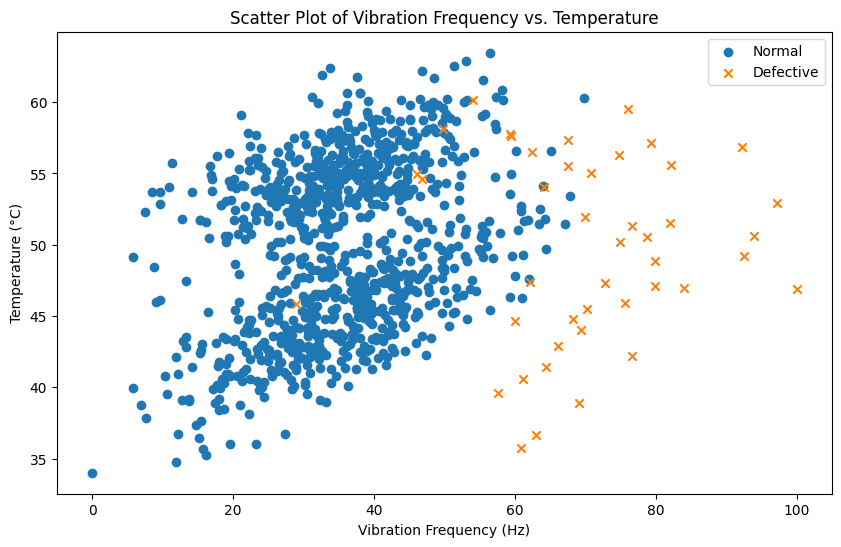

In [1]:
# write code to load dataset and visulize data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 1. Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Normal', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Defective', marker='x')
plt.xlabel("Vibration Frequency (Hz)")
plt.ylabel("Temperature (°C)")
plt.title("Scatter Plot of Vibration Frequency vs. Temperature")
plt.legend()
plt.show()

#### B. What are your observations regarding the distribution of classes? Identify if the dataset is balanced or imbalanced.

**Answer:** The dataset does not appears to have a relatively balanced distribution between normal and defective components.

### 2. Data Splitting, Pre-processing and Model Training:

#### A. Split the dataset into 60% training, 20% validation, and 20% testing.
#### B. Train an ANN with 2 hidden layers of 20 neurons each.
#### C. Use ReLU activation for hidden layers and sigmoid activation for the output layer.
#### D. Train models with L2 regularization coefficients of 0, 0.01, and 1.


In [3]:
# write code to build and train ANN using tensorflow.keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

# 2. Data Splitting, Pre-processing and Model Training
# Split the data using the UIN-based random state
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=21)

# Standardize the data using only training data statistics
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train ANN with L2 regularization
model = Sequential([
    Dense(20, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=32, verbose=0)

### 3. Compute Accuracy

#### A. Compute the accuracy for all models on validation dataset using the default threshold probability of 0.5.

In [4]:
# write code to compute accuracy
from sklearn.metrics import accuracy_score

# 3. Compute Accuracy
y_pred = (model.predict(X_val) > 0.5).astype("int32").ravel()
accuracy = accuracy_score(y_val, y_pred)

print(f"Model Accuracy: {accuracy}")

7/7 [==============================] - 0s 3ms/step
Model Accuracy: 0.99


#### B. Based on accuracy, which models are performing well and which are not?

**Answer:** 

#### C. Can accuracy be a sole metric for evaluating the model's performance? Why?

**Answer:** 

### 4. Loss and accuracy vs Epoch Visualization

#### A. Plot the loss and accuracy vs epoch for both training and validation sets.

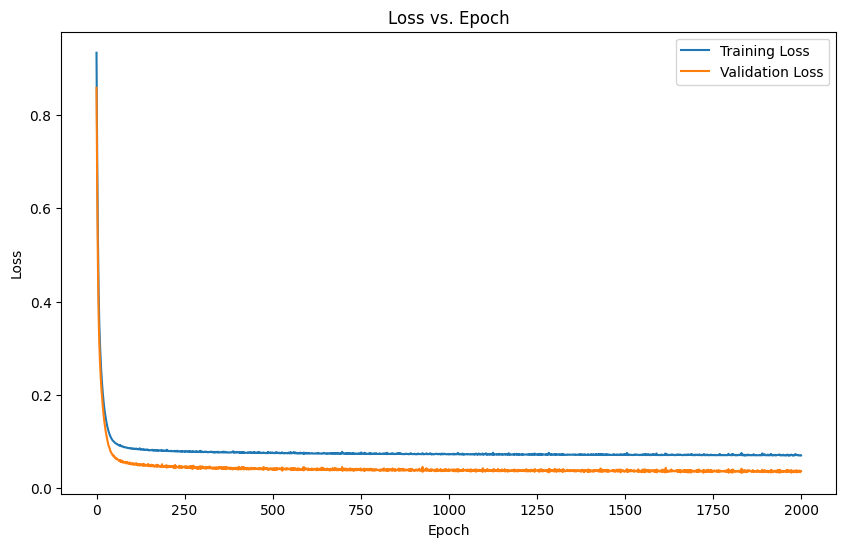

In [5]:
# write code to plot loss and accuracy vs epoch
# 4. Loss vs Epoch Visualization
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.show()

#### B. Which models are performing well based on these plots, and which are not? Justify your answer.

**Answer:** 

### 5. Compute ROC-AUC

#### A. Use sklearn.metrics to get Receiver Operating Characteristic (ROC) curve and plot it, then compute the Area Under the Curve (AUC) value for each model.

7/7 [==============================] - 0s 251us/step


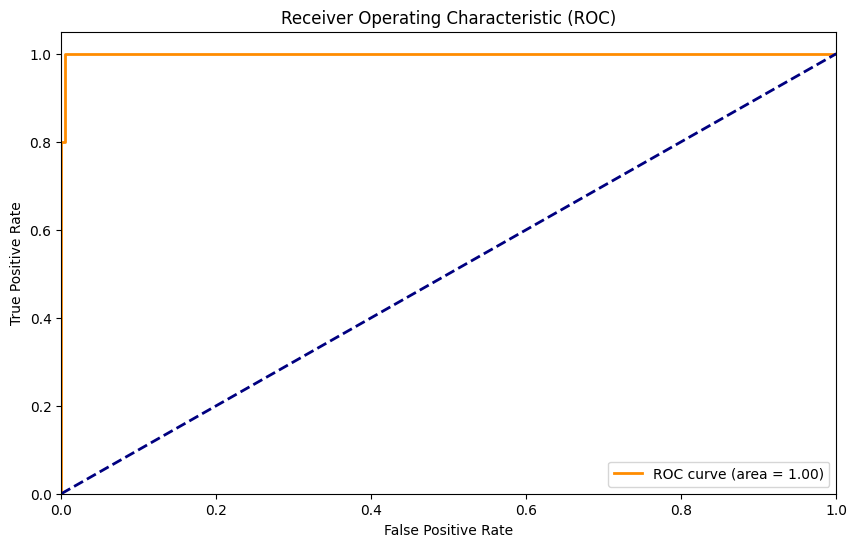

In [6]:
# write code to compute ROC
from sklearn.metrics import roc_curve, auc

# 5. Compute ROC-AUC
y_prob = model.predict(X_val).ravel()

fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### B. How does the ROC-AUC score correlate with the model's ability to distinguish between the classes?

**Answer:** 

#### C. Which models, according to the ROC-AUC score, are acceptable, and why?

**Answer**: 

### 6. Compute other metrics

Use sklearn.metrics to compute the metrics: accuracy, F1-Score, specificity, balanced accuracy, precision, recall, and confusion matrix for each model. Please use the default threshold probability 0.5. What observations can you make based on the computed metrics?

In [7]:
# write code to compute other metrics
from sklearn.metrics import confusion_matrix, classification_report

# 6. Compute other metrics
y_pred = (y_prob > 0.5).astype("int32")
confusion = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[194   1]
 [  1   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.80      0.80      0.80         5

    accuracy                           0.99       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.99      0.99      0.99       200



**Answer:** 

### 7. Decision Boundary Visualization

#### A. Plot the decision boundaries for the trained models on training dataset

7813/7813 [==============================] - 6s 770us/step


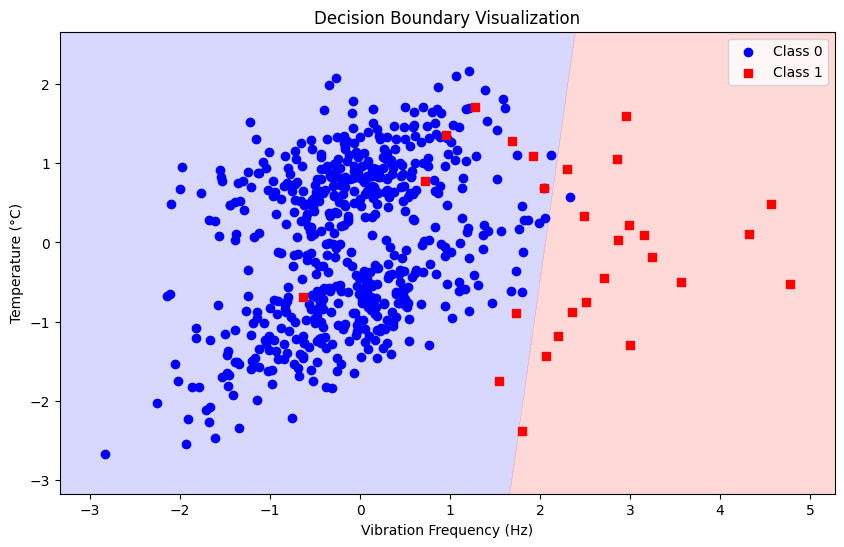

In [8]:
# write code to plot decision boundary
import numpy as np

# 7. Decision Boundary Visualization
x0s = np.linspace(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, 500)
x1s = np.linspace(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5, 500)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = model.predict(X_new)
zz = y_pred.reshape(x0.shape)
contour_colors = [(0.5, 0.5, 1), (1, 0.5, 0.5)]

plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, zz, levels=[0, 0.5, 1], colors=contour_colors, alpha=0.3)
    
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c="blue", label="Class 0")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c="red", label="Class 1", marker='s')    

plt.xlabel("Vibration Frequency (Hz)")
plt.ylabel("Temperature (°C)")
plt.title("Decision Boundary Visualization")
plt.legend()
plt.show()

#### B. Explain your observations and relate them with the computed evaluation metrics.

**Answer:** 

### 8. Model selection

Based on step 3-7, which model will you select as your classifier?

**Answer:** 

### 9. Threshold Selection

#### A. For this problem, decide whether precision or recall is more critical. Justify your choice.

**Answer:** 

#### B. Utilizing your chosen model, generate a plot for the Precision-Recall curve. How do precision and recall values change relative to each other?

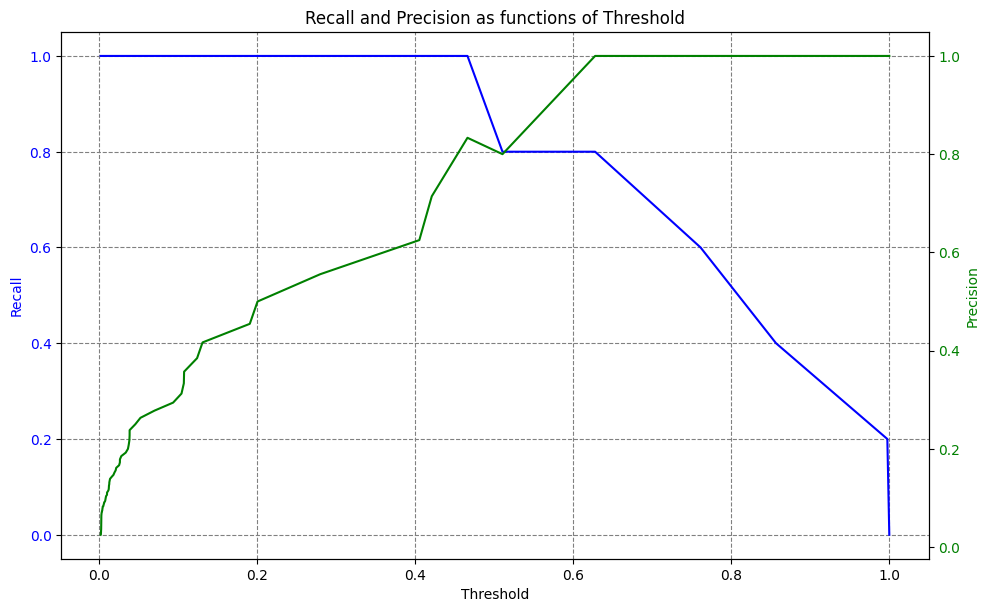

In [9]:
# write code to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# 9. Threshold Selection
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

thresholds = np.append(thresholds, 1)

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.grid(True, which='both', axis='both', linestyle='--', color='gray')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Recall', color='blue')
ax1.plot(thresholds, recall, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel('Precision', color='green')
ax2.plot(thresholds, precision, color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()
plt.title('Recall and Precision as functions of Threshold')
plt.show()

**Answer:** 

#### C. Utilizing your chosen model, plot recall and precision as a function of the threshold value on the validation data. Use two y-axes to visualize precision and recall on the same plot.

In [23]:
# write code to plot recall and precision vs threshold

#### D: Examine the effects of adjusting the threshold probability on the values of recall and precision. Specifically, analyze how increasing the threshold above 0.5 or decreasing it below 0.5 impacts these metrics. Discuss the implications of these adjustments for model performance and decision-making in the context of defect detection

**Answer:** 

#### E. Use the plot generated in question C, and determine a threshold probability value for classification such that the chosen metric (either precision or recall) is equal or greater than 0.8 while keeping the other metric as high as possible. 

In [24]:
# write code to find and print out the threshold

### 10. Final Evaluation

#### A. Compute the recall and precision on the test data using the selected threshold value.

In [10]:
# write code to compute recall and precision on test dataset
from sklearn.metrics import precision_score, recall_score


threshold = thresholds[np.argmax(precision >= 0.8)]
y_test_pred = (model.predict(X_test) > threshold).astype("int32").ravel()
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")

7/7 [==============================] - 0s 3ms/step
Precision on Test Data: 0.80
Recall on Test Data: 0.73


#### B. Is the performance satisfactory? Discuss any potential improvements that could be made.

**Answer:** 